<a href="https://colab.research.google.com/github/lionelalexandre/4TPU271/blob/main/S2_TD1_python_notebook_en_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue"> <center>Teacher / DS : 4TPU271 & 4TPU279U $-$ Licence 1ère année $-$ printemps 2023</center></span>
# <center>Méthodes numériques pour les Sciences</center>
# <hr style="border:1px solid black"><center>Introduction à la programmation Python </center><hr style="border:1px solid black">
</br>

Déposer ce fichier **notebook** complété ou un fichier **python** édité via Spyder, sur la page
[Moodle](https://moodle1.u-bordeaux.fr/course/view.php?id=12271) consacrée à votre demi-groupe.


Renommer le fichier suivant : 
- `DST_NomPrenom_S2.ipynb` pour un fichier *jupyter-notebook*

ou 

- `DST_NomPrenom_S2.py` pour un fichier *python* pur

<div class="alert alert-block alert-warning">
<b>ATTENTION :</b> Abolir totalement l’emploi des espaces, lettres accentuées et autres symboles
dans le nom du fichier !
</div>

**Les points suivants seront pris en compte pour l'évaluation :**
- respect des consignes
- mise en forme des figures (légendes, unités, titre etc...)
- clarté des programmes et mise en page

</br>
<div style="text-align: right"> Credits: R. Boisgard, L. Truflandier, Philippe Paillou, Julien Burgin, Sara Zein, Leo Delmarre, Simon Villain-Guillot, Louise Marinho </div>


## <hr style="border:1px solid black"> Exercice 1 : algorithmique <hr style="border:1px solid black">

On souhaite évaluer numériquement pour $a\in\mathbb{R}:$ $e^a$ en utilisant la série suivante :
$$e^a=\sum_{n=0}^{+\infty}\frac{a^n}{n!}$$

1. Donner $n\in[1,+\infty[$ écrire un programme permettant le calcul de $n!$ Tester le programme avec $n=10$.

<span style="color:red">**solution :**</span>

In [14]:
n = 10

fact = 1
for i in range(1,n+1):
    fact = fact*i

print(fact)

3628800


2. Comparer votre résultat à la valeur délivrée par la fonction `numpy.math.factorial` 

<span style="color:red">**solution :**</span>

In [15]:
import numpy
numpy.math.factorial(10)

3628800

3. Dans ce même programme s'assurer que lorsque $n=0$ alors $0!=1$.

<span style="color:red">**solution : ici pas de problème**</span>

In [16]:
n = 0

fact = 1
for i in range(1,n+1):
    fact = fact*i

print(fact)

1


4. A partir de ce programme écrire une fonction appelée `factorial` qui prends pour argument $n$ et renvoie $n!$ Tester cette fonction.

<span style="color:red">**solution :**</span>

In [17]:
def factorial(n):
    fact = 1
    for i in range(1,n+1):
        fact = fact*i
    return fact

res = factorial(n=10)
print(res)

3628800



1. En utilisant la fonction `factorial` et une boucle `for` calculer $e^1$ à partir des 10 premiers termes de la série. Comparer cette valeur à la valeur attendue et faire afficher l'erreur. *Remarque: si vous n'avez pas réussi à écrire la fonction `factorial` vous pouvez utiliser la fonction `numpy.math.factorial`*.

<span style="color:red">**solution :**</span>

In [18]:
from numpy import exp

a   = 1
res = 0
for n in range(10):
    res = res + a**n/factorial(n)
    
print('exp(1) serie =',res   )
print('exp(1) numpy =',exp(a))
print('error        =',exp(a)-res)

exp(1) serie = 2.7182815255731922
exp(1) numpy = 2.718281828459045
error        = 3.0288585284310443e-07


5. ***Bonus :*** A l'aide d'une structure `while` reprendre la question 4. avec pour condition le fait que la
sommation doit s'arrêter lorsque la différence absolue entre les approximations de $e^a$ à l'itération $n$ et $n+1$, est inférieure à une valeur seuil $\epsilon$. On prendra $a=2$ et $\epsilon=10^{-4}$. Faire afficher la valeur finale de $n$.

<span style="color:red">**solution :**</span>

In [19]:
from numpy import exp

eps = 1e-4
err = eps*10

a   = 2
n   = 0
res = 0
res_old = 0

while ( err > eps ):
    res = res + a**n/factorial(n)
    n   = n + 1
    err = abs(res_old - res)
    res_old = res

print('n =',n)
print('exp(2) serie =',res   )
print('exp(2) numpy =',exp(a))
print('error        =',exp(a)-res)

n = 12
exp(2) serie = 7.389046015712681
exp(2) numpy = 7.38905609893065
error        = 1.0083217969025782e-05


## <hr style="border:1px solid black"> Exercice 2 : potentiel de Morse et représentation graphique <hr style="border:1px solid black">

On souhaite étudier le potentiel de Morse de la molécule de Cl$_2$ décrivant la variation d'énergie potentielle en fonction de la distance $x$ entre les 2 atomes de chlore. Son expression est donnée par :
$$ V(x) = D_e \left( 1 - e^{-\beta (x-x_{e})}\right)^2$$
On remarquera :
- $\lim_{x\rightarrow\infty}V(x) = D_e$ où $D_e$ correspond à la profondeur du puit de potentiel.
- $V(x_e) = 0$ où $x_e$ correspond à la distance d'équilibre des 2 atomes.

Pour Cl$_2$ on donne : $D_e = 242.6$ kJ.mol$^{-1}$ et $x_e=2.0$ Ang et $\beta=2.0$ Ang$^{-1}$.

1. Représenter graphiquement le potentiel de Morse. Respecter les consignes suivantes pour le tracé :
    - En utilisant la fonction `linspace`, on representera $V$ en fonction de $x$ pour $x\in[1.6,5.0]$ avec 256 point de discrétisation.
    - On légendera les axes avec les unités.
    - On fera apparaître un axe horizontal en pointillé noir correspondant à $D_e$.
    - On localisera $x_e$ par un cercle noir sur la courbe.
    - Le domaine du tracé sera borné : suivant l'axe des absisses de 1.3 à 5.2, et de -20 à 350
    suivant l'axe des ordonnées. On utilisera par les fonctions `xlim` et `ylim` comme proposé ci-dessous.

In [155]:
import matplotlib.pyplot as plt

#plt.xlim( 1.3,5.2)
#plt.ylim(-20, 350)

<span style="color:red">**solution :**</span>

In [302]:
from numpy import exp, linspace
from scipy.constants import e, Avogadro

def pot_morse(x,De,beta,xe):
    return De*(1 - exp(-beta*(x-xe)))**2

De   = 242.6*1e3/Avogadro/e
print(' De = ', De, e)
beta = 2.00
xe   = 2.00

 De =  2.5143718186092037 1.602176634e-19


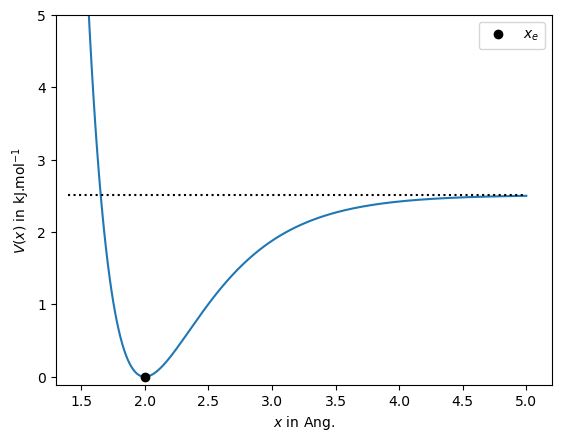

In [306]:
import matplotlib.pyplot as plt

x = linspace(1.4,5,256)
V = pot_morse(x,De,beta,xe)

plt.plot(x,V)
plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)$ in kJ.mol$^{-1}$')

De_plot = linspace(De,De,256)
plt.plot(x,De_plot,color='black',linestyle=':')

plt.plot(xe,0.0,marker='o',linestyle='',color='black',label='$x_e$')
plt.xlim(1.3,5.2)
plt.ylim(-0.1,5)
plt.legend()

Pour des faibles variations de $x$ au voisinnage de $x_e$, on peut décomposer le potentiel de Morse par
des fonctions analytiques plus simples et ainsi l'assimiler à l'énergie potentielle d'un oscillateur harmonique. Le développement au deuxième ordre de Taylor de $V(x)$ au voisinnage the $x_e$ permet d'approximer le $V(x)$ par :
$$ V_\text{harm}(x) = \beta^2 D_e(x-x_e)^2$$

2. Reprendre le graphique précédent et ajouter le potentiel harmonique $V_\text{harm}(x)$. Faire afficher la légende de chaque graphique. Ne pas oublier de borner la représentation comme dans la question précédente.

<span style="color:red">**solution :**</span>

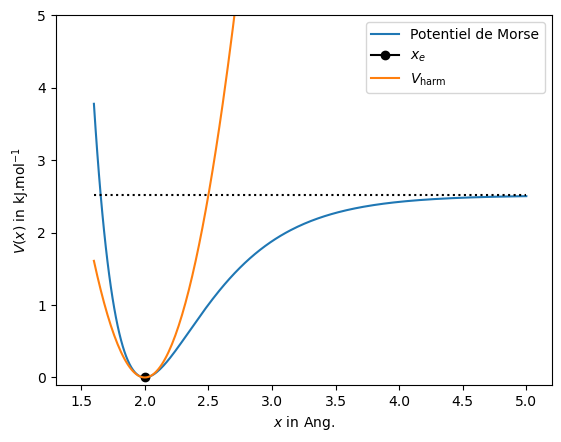

In [307]:
import matplotlib.pyplot as plt

x = linspace(1.6,5,256)
V = pot_morse(x,De,beta,xe)

plt.plot(x,V,label='Potentiel de Morse')
plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)$ in kJ.mol$^{-1}$')

De_plot = linspace(De,De,256)
plt.plot(x,De_plot,color='black',linestyle=':')
plt.plot(xe,0.0,marker='o',color='black',label='$x_e$')

V_harm = beta**2*De*(x - xe)**2
plt.plot(x,V_harm,label='$V_\mathrm{harm}$')

plt.xlim(1.3,5.2)
plt.ylim(-0.1,5)
plt.legend()


3. Représenter l'écart $V(x) - V_\text{harm}(x)$ sur un nouveau graphique pour $x\in[1.95,2.05]$.

Text(0, 0.5, '$V(x)-V_\\mathrm{harm}(x)$ in kJ.mol$^{-1}$')

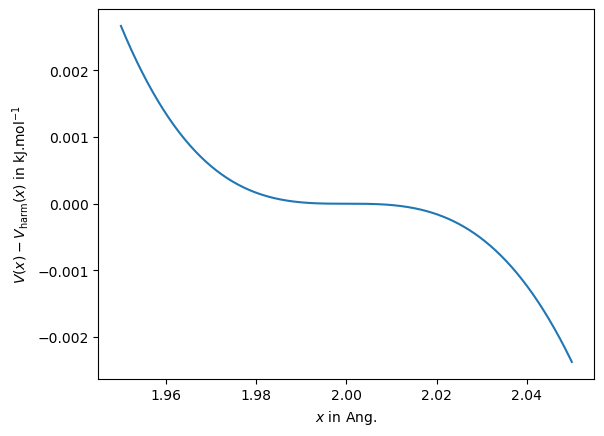

In [308]:
import matplotlib.pyplot as plt

x = linspace(1.95,2.05,256)
V = pot_morse(x,De,beta,xe)
V_harm = beta**2*De*(x - xe)**2

plt.plot(x,V-V_harm)
plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)-V_\mathrm{harm}(x)$ in kJ.mol$^{-1}$')

3. ***Bonus :*** Pour aller au delà de l'approximation harmonique on peut rajouter des termes de correction
résultant des ordres supérieurs du développement de Taylor. On propose de représenter le potentiel anharmonique :
$$ V_\text{anharm}(x) = \beta^2 D_e(x-x_e)^2 - \beta^3 D_e(x-x_e)^3 $$

<span style="color:red">**solution :**</span>

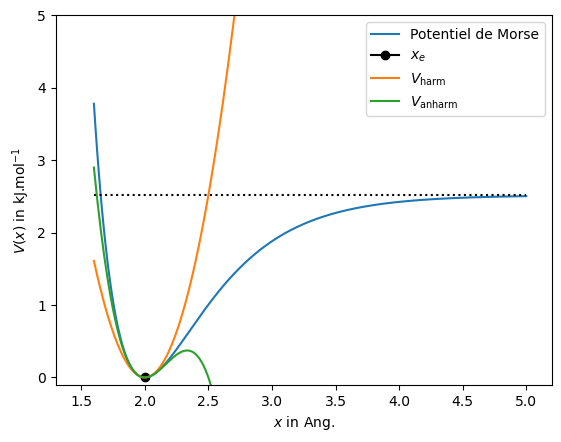

In [309]:
import matplotlib.pyplot as plt

x = linspace(1.6,5,256)
V = pot_morse(x,De,beta,xe)

plt.plot(x,V,label='Potentiel de Morse')
plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)$ in kJ.mol$^{-1}$')

De_plot = linspace(De,De,256)
plt.plot(x,De_plot,color='black',linestyle=':')
plt.plot(xe,0.0,marker='o',color='black',label='$x_e$')

V_harm = beta**2*De*(x - xe)**2
plt.plot(x,V_harm,label='$V_\mathrm{harm}$')

V_anharm = beta**2*De*(x - xe)**2 - beta**3*De*(x - xe)**3
plt.plot(x,V_anharm,label='$V_\mathrm{anharm}$')

plt.xlim(1.3,5.2)
plt.ylim(-0.1,5)
plt.legend()

4. ***Bonus :*** En utilisant les même paramètres de représentation graphique que précédement, ajouter sur le graphique, le potentiel anharmonique. Sur un deuxième graphique représenter l'erreur $V(x)-V_\text{harm}(x)$ et $V(x)-V_\text{anharm}(x)$.

<span style="color:red">**solution :**</span>

Text(0, 0.5, 'Erreur in kJ.mol$^{-1}$')

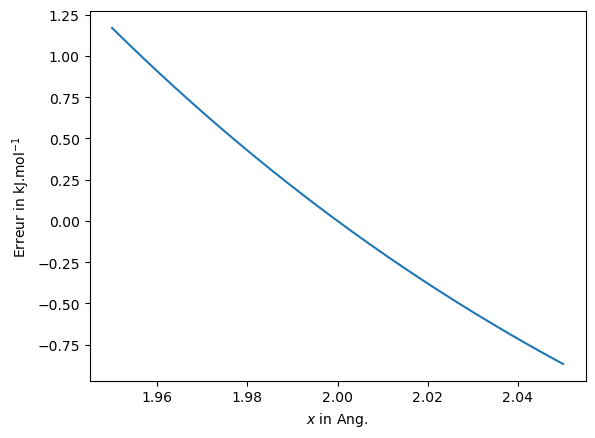

In [310]:
import matplotlib.pyplot as plt

x = linspace(1.95,2.05,256)
#x = linspace(1.45,2.35,256)

V = pot_morse(x,De,beta,xe)

#V_harm = beta**2*De*(x - xe)**2
#plt.plot(x,V-V_harm,label='V harm')

#V_anharm = beta**2*De*(x - xe)**2 - beta**3*De*(x - xe)**3
#plt.plot(x,V-V_anharm,label='V anharm')

#plt.plot(x,-2*beta*De*( exp(-beta*(x-xe)) - exp(-2*beta*(x-xe))))

plt.xlabel('$x$ in Ang.')
plt.ylabel('Erreur in kJ.mol$^{-1}$')
#plt.legend()

<hr style="border:1px solid grey">

## <hr style="border:1px solid black"> Exercice 2 : équation de la dynamique <hr style="border:1px solid black">

> On souhaite étudier le mouvement d'un des atomes de chlore soumis soumis à la force dérivant du potentiel harmonique $V_\text{harm}(x)$ tel que : $$\vec{f}=-\frac{dV_\text{harm}}{dx}\:\vec{e}_x=-k(x-x_e)\:\vec{e}_x$$
avec $k=2\beta^2D_e$ la constante de force de la liaison Cl$-$Cl.

1. A partir des constantes $\beta$ et $D_e$ données précédemment, calculer la valeur $k$ en N.m$^{-1}$.
Pour les conversions, on utilisera les constantes physiques de la librarie `scipy.constants`. Par la suite on prendra $k=322.3$ N.m$^{-1}$.

<span style="color:red">**solution :**</span>

In [378]:
from scipy.constants import Avogadro, m_e

De   = 242.6     # kJ.mol-1
beta = 2.00      # Ang^-1

k = 2*beta**2*De*1000/Avogadro*(1e+10)**2
print(' k = %.1f N.m^-1'%k)

De   = 242.6*1e3/Avogadro/e
beta = 2.00      # Ang^-1

k = 2*beta**2*De
print(' k = %.1f eV.Ang^-2'%k)



 k = 322.3 N.m^-1
 k = 20.1 eV.Ang^-2


> On souhaite étudier le mouvement d'un des atomes de chlore soumis soumis à la force dérivant du potentiel de Morse : $$\vec{f}=-\frac{dV}{dx}\vec{e}_x \quad\quad\textcolor{green}{(9)}$$ 

> On commence par définir le membre de droite de l'équation de la dynamique :

In [370]:
xe = 2
def f(x):
    xe = 2
    k  = 2*beta**2*De    
#    return - k*(x-xe)
    return - 2*beta*De*( exp(-beta*(x-xe)) - exp(-2*beta*(x-xe)) ) 


In [381]:
from numpy import pi, arange, zeros, cos, sqrt
from scipy.constants import e, Avogadro, electron_volt

#m = 35.45/Avogadro*1e-3
#print(m)
m = 35.45
print(m)

tmax = 2*pi*sqrt(m/k)
print(tmax)

print(' time unit = ',sqrt(1/(1.602*6.022e27))) 
print(' time unit = ',sqrt(1e-3*(1e-10)**2/(Avogadro*electron_volt)))



tmin = 0.0
#tmax = 2*pi*sqrt(m/k)
#h    = 0.0001e-12
#tmax = 2*pi*sqrt(m/k)*1e-10


h    = tmax*0.001
print(tmax)
t    = arange(tmin,tmax,h)


35.45
8.34119442746394
 time unit =  1.018118592725363e-14
 time unit =  1.0180505712518498e-14
8.34119442746394


In [372]:
#m = 35.45/Avogadro*1e-3
#m = 35.45
x = zeros(len(t))
v = zeros(len(t))

#x0 = 2.15e-10
x0 = 2.55
v0 = 0.0

In [373]:
x[0] = x0
v[0] = v0
for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*f(x[i+1])/m

In [374]:
from numpy import pi

T = 2*pi*sqrt(m/k)
print(T)

8.34119442746394


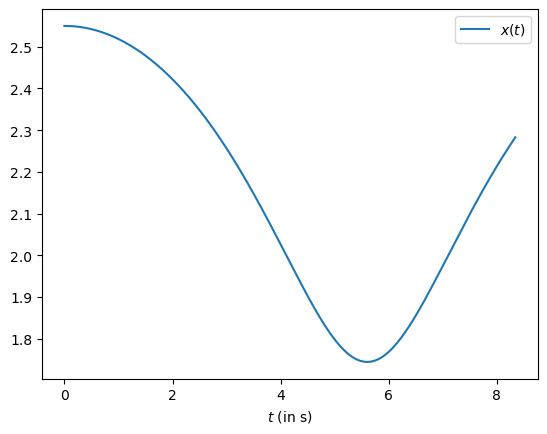

In [375]:
import matplotlib.pylab as plt

#x_analy = x0*cos( sqrt(k/m)*t )

plt.plot(t,x,marker='',label='$x(t)$')
#plt.plot(t,v,marker='',label='$v(t)$')
#plt.plot(t,x_analy,marker='',label='$x(t)$ analytic',)
plt.xlabel('$t$ (in s)')
plt.legend()

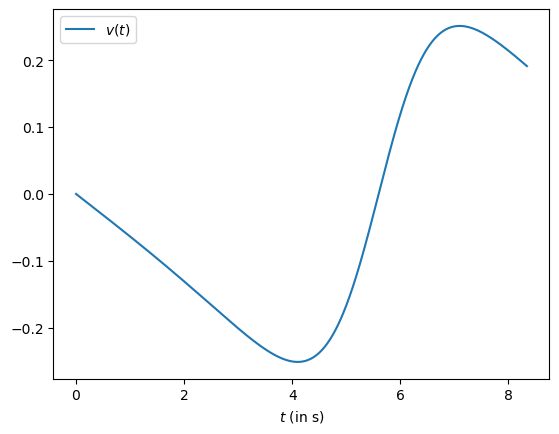

In [376]:
import matplotlib.pylab as plt

#x_analy = x0*cos( sqrt(k/m)*t )

#plt.plot(t,x,marker='',label='$x(t)$')
plt.plot(t,v,marker='',label='$v(t)$')
#plt.plot(t,x_analy,marker='',label='$x(t)$ analytic',)
plt.xlabel('$t$ (in s)')
plt.legend()

In [377]:
35.5/Avogadro*1e-3/m_e



64712.54128307789

In [369]:
0.001/Avogadro*1e-3

1.6605390671738466e-30

In [287]:
#De   = 242.6 #/ 2625.5
#beta = 2.00  #/ 0.529177
#xe   = 2.00  #/ 0.529177

def f(x):
    return - 2*beta*De*( exp(-beta*(x-xe)) - exp(-2*beta*(x-xe)) ) * 1000/(6.022e23) * 1e+10 
#    return - 322.7*(x-xe)

#beta = 2.00 / 1e-10
#De= 242.6 * 1000/(6.022e23)
#xe= 2.00e-10
#x = 2.05e-10
x = 1.999e-10
print( -   2*beta*De*( exp(-beta*(x-xe*1e-10)) - exp(-2*beta*(x-xe*1e-10)) ) * 1000/(6.022e23)  * 1e+10 )
print( - 322.7*(x-xe) *1e-10 )
print( -   2*beta*De  * 1000/(6.022e23) * 1e+10  )
print(     exp(-beta*(x-xe*1e-10)) - exp(-2*beta*(x-xe*1e-10)))
print(     (x-xe*1e-10) )
print(     2*beta**2*De * 1000/(6.022e23) * 1e+10 /2 )







3.2202735994242e-21
6.453999999354923e-08
-1.611424775821986e-08
-1.9984014443252818e-13
-1.0000000000000482e-13
1.611424775821986e-08


In [288]:
from numpy import pi, arange, zeros, cos, sqrt

tmin = 0.0
tmax = 10e10
h    = 0.001e10
t    = arange(tmin,tmax,h)

> On initialise $m$, les tableaux pour $x$ et $v$ ainsi que les conditions initiales :

In [289]:
m = 35.45
x = zeros(len(t))
v = zeros(len(t))

x0 = 2.15e-10
v0 = 0.0

> On applique la relation de récurrence de Hooke-Newton à $x$ et à $v$ :
Ici on propose d'étudier la méthode de Hooke-Newton décrite ci-dessous :
$$\begin{align}
x(t_{i+1}) &= x(t_i) + h\;v(t_i)\\   
v(t_{i+1}) &= v(t_i)+\frac{h}m f\left(x(t_{i+1})\right) \\ 
\end{align}$$

In [290]:
x[0] = x0
v[0] = v0
for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*f(x[i+1])/m

> Tracer des lois horaires $x(t)$ et $v(t)$ et de la solution analytique :

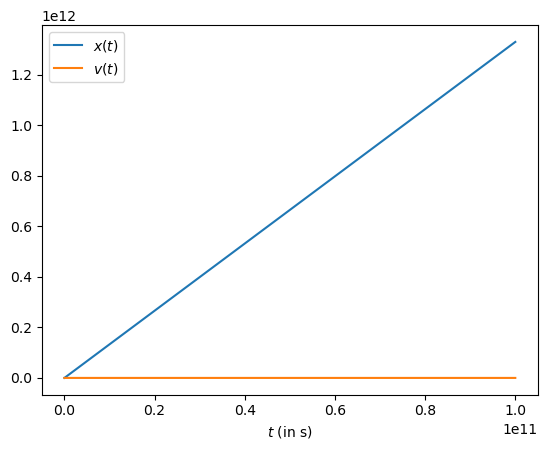

In [291]:
import matplotlib.pylab as plt

#x_analy = x0*cos( sqrt(k/m)*t )

plt.plot(t,x,marker='',label='$x(t)$')
plt.plot(t,v,marker='',label='$v(t)$')
#plt.plot(t,x_analy,marker='',label='$x(t)$ analytic',)
plt.xlabel('$t$ (in s)')
plt.legend()